# Water Maze NWB Tutorial

This tutorial demonstrates how to load and explore an NWB file containing behavioral data from the Morris water maze experiment, part of the [Rat Behavioural Phenotyping Pipeline Methodologies](https://sidb.org.uk/facilities/rat-behavioural-phenotyping-pipeline/).

**Contents:**
- [Reading NWBFile locally](#read-nwb)
- [Access Subject Metadata](#access-subject)
- [Access Devices Metadata](#access-devices)
- [Access Behavioral Videos](#access-behavior)
- [Access Trials](#access-trials)


# Reading an NWB file locally <a id="read-nwb"></a>

This section demonstrates how to read an NWB file using `pynwb`.

Based on the [NWB File Basics](https://pynwb.readthedocs.io/en/stable/tutorials/general/plot_file.html#sphx-glr-tutorials-general-plot-file-py) tutorial from [PyNWB](https://pynwb.readthedocs.io/en/stable/#).

An [NWBFile](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.NWBFile) represents a single session of an experiment. Each NWBFile must have a `session description`, `identifier`, and `session start time`.

Reading is carried out using the [NWBHDF5IO](https://pynwb.readthedocs.io/en/stable/pynwb.html#pynwb.NWBHDF5IO) class. To read the NWB file use the read mode ("r") to retrieve an NWBFile object.

In [1]:
from pynwb import NWBHDF5IO
from pathlib import Path

# Define the path to the NWB file
directory = Path("D:/kind_lab_conversion_nwb/water_maze")
session_id = "WM_2_Reference_Day1"
subject_id = "302_Arid1b(2)"
nwbfile_path = directory / f"sub-{subject_id}_ses-{session_id}.nwb"
io = NWBHDF5IO(path=nwbfile_path, load_namespaces=True)
nwbfile = io.read()

In [2]:
print(nwbfile.experiment_description)

This experiment is part of the Rat Behavioural Phenotyping Pipeline Methodologies https://sidb.org.uk/facilities/rat-behavioural-phenotyping-pipeline/.
As an initial effort to characterize the rat lines, these models are being behaviorally phenotyped at SIDB.
Rat models are phenotyped according to a rigorous pipeline that assesses behaviours relevant to autism with intellectual disability, such as social and motor skills, and learning and sensory processing.
Different cohorts of rats are run through different subsets of tasks to overcome potential order effects on behaviours and to limit the number of tasks each animal is put through.
This experiment investigated spatial learning and memory in different rat models
(Arid1b: https://rgd.mcw.edu/rgdweb/report/strain/main.html?id=14394518,
Grin2b: https://rgd.mcw.edu/rgdweb/report/strain/main.html?id=14394515,
Scn2a: https://rgd.mcw.edu/rgdweb/report/strain/main.html?id=25394530) using the Morris Water Maze.
The experimenter was blind to g

In [3]:
print(nwbfile.session_description)

Long-term spatial memory assessment.
In long term spatial memory testing the platform remained in the same location over days and was 1-2 cm below water level.
Spatial cues were available.
In the first swim of each day the platform only became available after 1 min.



Importantly, the `session start time` is the reference time for all timestamps in the file. For instance, an event with a timestamp of 0 in the file means the event occurred exactly at the session start time.

The `session_start_time` is extracted from the CSV table (e.g. "Reference_analysis.csv") that contains a "Date" and "Time" column.

In [4]:
print(nwbfile.session_start_time)

2022-09-16 10:18:00+01:00


# Access Subject Metadata <a name="access-subject"></a>

This section demonstrates how to access the [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field in an NWB file.

The [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field can be accessed as `nwbfile.subject`.


In [5]:
nwbfile.subject

subject pynwb.file.Subject at 0x1853616733024
Fields:
  age__reference: birth
  date_of_birth: 2022-06-07 00:00:00+02:00
  sex: M
  species: Rattus norvegicus
  subject_id: 302_Arid1b(2)

# Access Devices Metadata <a name="access-devices"></a>

This section demonstrates how to access the [Device](https://pynwb.readthedocs.io/en/stable/pynwb.device.html#module-pynwb.device) field in an NWB file.

The [Device](https://pynwb.readthedocs.io/en/stable/pynwb.device.html#module-pynwb.device) field can be accessed as `nwbfile.devices`.

In [6]:
nwbfile.devices["AtlantisPlatform"]

AtlantisPlatform pynwb.device.Device at 0x1853616732976
Fields:
  description: Programmable platform (10cm diameter) that can rise from pool bottom (Spooner et al., 1994)
  manufacturer: Example Manufacturer

In [7]:
nwbfile.devices["BehavioralCamera"]

BehavioralCamera pynwb.device.Device at 0x1853616725152
Fields:
  description: CCTV camera mounted on ceiling above arenas for behavioral recording
  manufacturer: Example Manufacturer

In [8]:
nwbfile.devices["WaterMaze"]

WaterMaze pynwb.device.Device at 0x1855055127728
Fields:
  description: Circular pool (2m diameter) with Atlantis platform and spatial cues
  manufacturer: Example Manufacturer

# Access Behavioral Video <a name="access-behavior"></a>

The behavioral videos are stored as an external `ImageSeries` in the NWB file.

In [9]:
# List all behavioral video acquisitions
for name in nwbfile.acquisition:
    if "BehavioralVideo" in name:
        print(name)

BehavioralVideoTrial1
BehavioralVideoTrial2
BehavioralVideoTrial3
BehavioralVideoTrial4


In [10]:
video = nwbfile.acquisition["BehavioralVideoTrial1"]
video

Data type,uint8
Shape,"(0, 0, 0)"
Array size,0.00 bytes
Chunk shape,None
Compression,None
Compression opts,None
Compression ratio,undefined
Data type,object
Shape,"(1,)"
Array size,8.00 bytes
Chunk shape,None


The video filepath:

In [11]:
video.external_file[0]

'/Volumes/T9/Behavioural Pipeline/Water Maze/Arid1b/Arid1b(2)_WM/2_Reference/302_00.avi'

The metadata of the device used to record the behavioral video:

In [12]:
video.device

BehavioralCamera pynwb.device.Device at 0x1853616725152
Fields:
  description: CCTV camera mounted on ceiling above arenas for behavioral recording
  manufacturer: Example Manufacturer

# Access Trials <a id="access-trials"></a>

The `nwbfile.trials` contains information about each swim trial, including start and stop times, and trial-specific metrics such as path length, duration, and swim speed.

The source of this table is the Water Maze analysis CSV file, generated by the WaterMaze software.

You can convert the trials table to a `pandas.DataFrame` for easier exploration:



In [13]:
trials = nwbfile.trials.to_dataframe()
trials

,start_time,stop_time,platform,time_to_platform,trial_duration,distance_travelled_cm,average_speed,percent_time_near_walls,platform_quadrant,time_in_NE_quadrant,...,time_in_NW_quadrant,percent_time_in_NW_quadrant,time_to_platform_NW,time_in_SW_quadrant,percent_time_in_SW_quadrant,time_to_platform_SW,time_in_SE_quadrant,percent_time_in_SE_quadrant,time_to_platform_SE,timeseries
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,103.050,NE_A,102.760,103.050,3217.592,31.224,1.359,1,35.117,...,13.206,12.816,33.506,19.009,18.447,0.0,35.717,34.660,0.0,"[(0, 1030, BehavioralVideoTrial1 pynwb.image.I..."
1,1320.0,1329.349,NE,9.051,9.349,303.463,32.459,0.000,1,3.936,...,0.000,0.000,0.000,0.000,0.000,0.0,5.413,57.895,0.0,"[(0, 93, BehavioralVideoTrial2 pynwb.image.Ima..."
2,2820.0,2827.957,NE,5.949,7.957,156.390,19.654,0.000,1,5.599,...,2.358,29.630,0.000,0.000,0.000,0.0,0.000,0.000,0.0,"[(0, 79, BehavioralVideoTrial3 pynwb.image.Ima..."
3,3840.0,3847.800,NE,7.501,7.800,253.789,32.537,2.532,1,1.284,...,0.296,3.797,0.000,3.456,44.304,2.6,2.765,35.443,4.6,"[(0, 78, BehavioralVideoTrial4 pynwb.image.Ima..."


C:\Users\Utente\AppData\Local\Temp\ipykernel_3848\2204253063.py:30: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o-" (-> marker='o'). The keyword argument will take precedence.
  ax2.plot(trial_numbers, trials['time_to_platform'], 'o-', color='#8c564b',


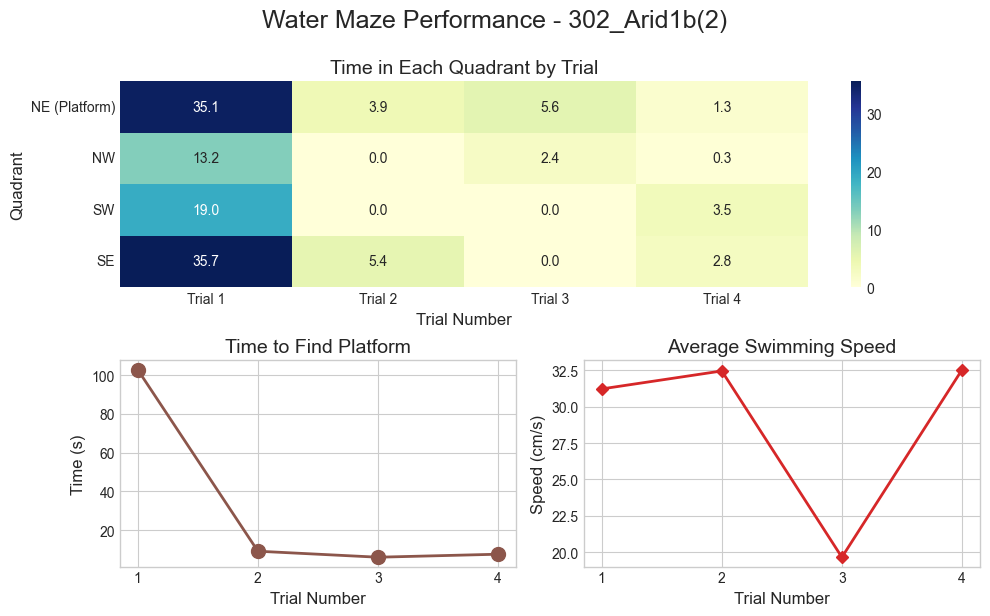

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set styling for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# Create a figure with better organization of plots
fig = plt.figure(figsize=(10, 6))

# Create a grid specification for better layout control
gs = fig.add_gridspec(2, 2)

# 1. Heat map of movement patterns (quadrant preferences over trials)
ax1 = fig.add_subplot(gs[0, :])
quadrant_columns = ['time_in_NE_quadrant', 'time_in_NW_quadrant', 
                   'time_in_SW_quadrant', 'time_in_SE_quadrant']
quadrant_data = trials[quadrant_columns]
quadrant_data.columns = ['NE (Platform)', 'NW', 'SW', 'SE']
sns.heatmap(quadrant_data.T, annot=True, cmap='YlGnBu', fmt='.1f', ax=ax1)
ax1.set_title('Time in Each Quadrant by Trial', fontsize=14)
ax1.set_ylabel('Quadrant', fontsize=12)
ax1.set_xlabel('Trial Number', fontsize=12)
ax1.set_xticklabels([f'Trial {i+1}' for i in range(len(trials))])

# 2. Time to find platform (decreasing trend shows learning)
ax2 = fig.add_subplot(gs[1, 0])
trial_numbers = range(1, len(trials) + 1)
ax2.plot(trial_numbers, trials['time_to_platform'], 'o-', color='#8c564b', 
         linewidth=2, marker='o', markersize=10)
ax2.set_title('Time to Find Platform', fontsize=14)
ax2.set_xlabel('Trial Number', fontsize=12)
ax2.set_ylabel('Time (s)', fontsize=12)
ax2.set_xticks(trial_numbers)

# 3. Speed profile across trials
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(trial_numbers, trials['average_speed'], 'D-', color='#d62728', linewidth=2)
ax3.set_title('Average Swimming Speed', fontsize=14)
ax3.set_xlabel('Trial Number', fontsize=12)
ax3.set_ylabel('Speed (cm/s)', fontsize=12)
ax3.set_xticks(trial_numbers)

plt.tight_layout()
plt.suptitle(f"Water Maze Performance - {subject_id}", fontsize=18, y=1.02)
plt.subplots_adjust(top=0.9)
plt.show()


The trials table also contains a `timeseries` column which contains references to the video associated with each trial.


In [15]:
# Access the external video from the trials table for the first trial
video_reference = nwbfile.trials["timeseries"][0][0]
video_object = video_reference.timeseries
video_object

Data type,uint8
Shape,"(0, 0, 0)"
Array size,0.00 bytes
Chunk shape,None
Compression,None
Compression opts,None
Compression ratio,undefined
Data type,object
Shape,"(1,)"
Array size,8.00 bytes
Chunk shape,None
